In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
import os
from PIL import Image

# Define the directory containing your dataset
data_dir = 'Data/Mei/'

# List of labels
#labels = ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ', 'ஃ']
labels = ['க்', 'ங்','ச்','ஞ்','ட்','ண்','த்','ந்','ப்','ம்','ய்','ர்','ல்','வ்','ழ்','ள்','ற்','ன்']

# Image size
imgSize = 300  # Define the desired size for your images

# Initialize lists to store images and labels
X = []
y = []

# Load images and corresponding labels
for label_idx, label in enumerate(labels):
    label_dir = os.path.join(data_dir, label)
    for img_name in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_name)
        img = Image.open(img_path)
        img = img.resize((imgSize, imgSize))  # Resize the image if needed
        img = np.array(img) / 255.0  # Normalize pixel values
        X.append(img)
        y.append(label_idx)  # Assign the index of the label to the image

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(imgSize, imgSize, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(labels), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 64)              

In [4]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


27/27 [==============================] - 72s 2s/step - loss: 1.9460 - accuracy: 0.6285 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 2/10
27/27 [==============================] - 78s 3s/step - loss: 0.0185 - accuracy: 0.9977 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/10
27/27 [==============================] - 58s 2s/step - loss: 2.2653e-04 - accuracy: 1.0000 - val_loss: 7.6977e-05 - val_accuracy: 1.0000
Epoch 4/10
27/27 [==============================] - 74s 3s/step - loss: 2.1380e-05 - accuracy: 1.0000 - val_loss: 4.2093e-05 - val_accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 69s 3s/step - loss: 1.0719e-05 - accuracy: 1.0000 - val_loss: 3.5185e-05 - val_accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 66s 2s/step - loss: 7.9227e-06 - accuracy: 1.0000 - val_loss: 3.1193e-05 - val_accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 74s 3s/step - loss: 6.3055e-06 - accuracy: 1.0000 - val_loss: 2.9070e-05 -

In [5]:
model.save('model.h5')

C:\Users\nandh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
i = 0
with open('labels.txt', 'w') as f:
    for label in labels:
        f.write(str(i)+" "+label + '\n')
        i+=1

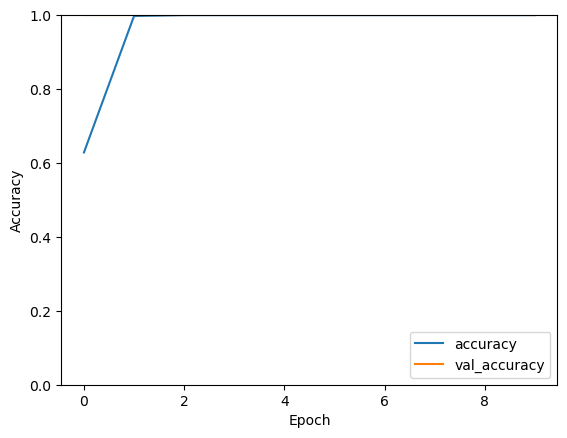

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig('accuracy_graph.png')
plt.show()

7/7 [==============================] - 6s 398ms/step


C:\Users\nandh\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 2965 (\N{TAMIL LETTER KA}) missing from current font.
  fig.canvas.draw()
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.draw()
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 3021 (\N{TAMIL SIGN VIRAMA}) missing from current font.
  fig.canvas.draw()
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 2969 (\N{TAMIL LETTER NGA}) missing from current font.
  fig.canvas.draw()
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 2970 (\N{TAMIL LETTER CA}) missing from current font.
  fig.canvas.draw()
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 2974 (\N{TAMIL LETTER NYA}) missing from current font.
  fig.canvas.draw()
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\utils.py:

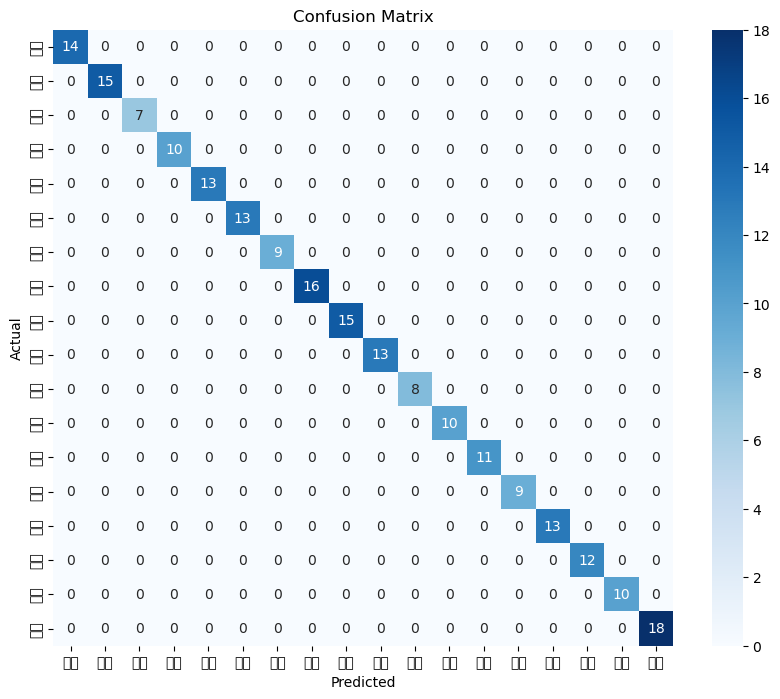

In [8]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import math
from gtts import gTTS
from playsound import playsound
import os

model = load_model('Model/uyir_model.h5')

# Define variables
offset = 20
imgSize = 300
labels = ['a', 'aa', 'i', 'ii', 'u', 'uu', 'e', 'ee', 'ai', 'o', 'oo', 'au', 'ak']
#labels = ['ik', 'ing', 'ich', 'inj', 'it', 'in', 'ith', 'indh', 'ip', 'im', 'iy', 'ir', 'il', 'iv', 'izh', 'ill', 'irr', 'inn']

# Function to preprocess the image
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    img = cv2.resize(img, (imgSize, imgSize))   # Resize to model's input shape
    img = np.expand_dims(img, axis=0)           # Add batch dimension
    img = img / 255.0                           # Normalize pixel values
    return img

# Function to predict letter from hand bounding box
def predict_letter_from_bbox(img, bbox):
    x, y, w, h = bbox
    imgCrop = img[y-offset: y+h+offset, x-offset: x+w+offset]
    imgCrop = preprocess_image(imgCrop)
    prediction = model.predict(imgCrop)
    predicted_class = np.argmax(prediction)
    predicted_letter = labels[predicted_class]
    return predicted_letter

# Example code to detect hands and make predictions
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)

while True:
    success, img = cap.read()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h= hand['bbox']
        letter = predict_letter_from_bbox(img, (x, y, w, h))
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, letter, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow('Prediction', img)
    key = cv2.waitKey(1)
    if key == 27:  # Press 'ESC' to exit
        break

cap.release()
cv2.destroyAllWindows()




1/1 [==============================] - 0s 43ms/step


In [3]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import math
from gtts import gTTS
from playsound import playsound
import os

model = load_model('Model/uyir_model.h5')

# Define variables
offset = 20
imgSize = 300
labels = ['a', 'aa', 'i', 'ii', 'u', 'uu', 'e', 'ee', 'ai', 'o', 'oo', 'au', 'ak']
#labels = ['ik', 'ing', 'ich', 'inj', 'it', 'in', 'ith', 'indh', 'ip', 'im', 'iy', 'ir', 'il', 'iv', 'izh', 'ill', 'irr', 'inn']

# Function to preprocess the image
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    img = cv2.resize(img, (imgSize, imgSize))   # Resize to model's input shape
    img = np.expand_dims(img, axis=0)           # Add batch dimension
    img = img / 255.0                           # Normalize pixel values
    return img

# Function to predict letter from hand bounding box
def predict_letter_from_bbox(img, bbox):
    x, y, w, h = bbox
    imgCrop = img[y-offset: y+h+offset, x-offset: x+w+offset]
    imgCrop = preprocess_image(imgCrop)
    prediction = model.predict(imgCrop)
    predicted_class = np.argmax(prediction)
    predicted_letter = labels[predicted_class]
    return predicted_letter

# Example code to detect hands and make predictions
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)

while True:
    success, img = cap.read()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h= hand['bbox']
        letter = predict_letter_from_bbox(img, (x, y, w, h))
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, letter, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow('Prediction', img)
    key = cv2.waitKey(1)
    if key == 27:  # Press 'ESC' to exit
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 39ms/step


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
